**Problem 1**

***1.Provide an analytic solution.***

$\because ax^2+bx+c=0$ has real solutions $\Leftrightarrow$ $b^2-4ac >= 0$
<br>$\therefore$P($ax^2+bx+c=0$ has real solutions)
<br>=P($b^2-4ac >= 0$)
<br>=P($b>=2\sqrt{ac}$|a,b,c~U(0,1))
<br>=1 - $\int_0^1 \int_0^1 min(2\sqrt{ac},1) {\rm d}a{\rm d}c$

$\int_0^1 \int_0^1 min(2\sqrt{xy},1) {\rm d}x{\rm d}y$
<br>=$(\frac{3}{4} - \int_\frac{1}{4}^1 \frac{1}{4x}{\rm d}x)$
<br>+$\int_0^1 \int_0^\frac{1}{4} 2\sqrt{xy} {\rm d}x{\rm d}y$
<br>+$\int_\frac{1}{4}^1 \ \int_0^\frac{1}{4x} 2\sqrt{xy} {\rm d}y{\rm d}x$
<br>=($\frac{3}{4} - \frac{1}{2}ln2$) +$\frac{1}{9}$ + $\frac{ln2}{3}$

$\therefore p = \frac{5}{36} + \frac{ln2}{6}$

***2.Use simulation to obtain the solution with the number of simulation run as follows: 5000, 10,000, 100,000 and 1, 000, 000, and compare the result with the above analytic solution by providing absolute and relative errors (defined as the absolute and relative difference from the true value you obtain in analytic solution.***

In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
Group_1 = [[random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)] for i in range(5000)]
Group_2 = [[random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)] for i in range(10000)]
Group_3 = [[random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)] for i in range(100000)]
Group_4 = [[random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)] for i in range(1000000)]
GROUP = [Group_1,Group_2,Group_3,Group_4]

In [3]:
result = []
for i in range(4):
    count = 0
    for group in GROUP[i]:
        if group[1]**2 - 4*group[0]*group[2] >= 0 :
            count += 1
    prob = count/len(GROUP[i])
    r_prob = 5/36 + np.log(2)/6
    abs_err = np.abs(r_prob - prob)
    rlt_err = abs_err/r_prob
    result += [len(GROUP[i]),prob,abs_err,rlt_err]
pd.DataFrame(np.reshape(result,(4,4)),columns=['number of simulation','Probability','absolute errors','relative errors'])

,number of simulation,Probability,absolute errors,relative errors
0,5000.0,0.257800,0.003387,0.013311
1,10000.0,0.252800,0.001613,0.006342
2,100000.0,0.253120,0.001293,0.005084
3,1000000.0,0.253982,0.000431,0.001696


***3.Apply the “whitening” techniques by getting rid of the random noises (mean, variance and correlation) from the generated random variables and do the same analysis as above. Report your result and draw some conclusion.***

In [4]:
result = []
for i in range(4):
    Group = GROUP[i]
    datamat = pd.DataFrame(Group)
    Data = datamat - datamat.describe().iloc[1,:]
    COV = Data.cov()
    cholmat = np.linalg.cholesky(COV)
    lamda = np.diag((1/12,1/12,1/12))
    Data_new = np.dot(np.dot(Data,np.linalg.inv(cholmat)),np.linalg.cholesky(lamda))+0.5
    count = 0
    for group in Data_new:
        if group[1]**2 - 4*group[0]*group[2] >= 0 :
            count += 1
    prob = count/len(Group)
    r_prob = 5/36 + np.log(2)/6
    abs_err = np.abs(r_prob - prob)
    rlt_err = abs_err/r_prob
    result += [len(GROUP[i]),prob,abs_err,rlt_err]
pd.DataFrame(np.reshape(result,(4,4)),columns=['number of simulation','Probability','absolute errors','relative errors'])

,number of simulation,Probability,absolute errors,relative errors
0,5000.0,0.259600,0.005187,0.020386
1,10000.0,0.252800,0.001613,0.006342
2,100000.0,0.252320,0.002093,0.008228
3,1000000.0,0.254704,0.000291,0.001142


Conclusion

After whitening the data, the absolute errors are very similar with the result before whitening. so there is no huge influence when applying whitening method.

**Problem 2**

***1.Prove E(X)=􏰀$\int_0^{+∞} S(x){\rm d}x$***

Proof:
<br>E(x) = $\int_0^{+∞} x{\rm d} F(x)$
<br>=$\int_0^{+∞} {\rm d} (xF(x))$ - $\int_0^{+∞} F(x){\rm d} x$
<br>=$\int_0^{+∞} {\rm d} (x - xS(x))$ + $\int_0^{+∞} S(x)-1{\rm d} x$
<br>=$-\int_0^{+∞} {\rm d}  xS(x)$ +$\int_0^{+∞} S(x){\rm d} x$
<br>=-xS(x)|$_0^{+∞}$ + $\int_0^{+∞} S(x){\rm d} x$
<br>=$\int_0^{+∞} S(x){\rm d} x$

***2.Suppose X is the loss distribution, and we have an insurance contract with a deductible L, and ceiling U, e.g., it pays nothing if loss is less than L, and pays X − L if loss is between L and U, and U − L if loss is larger than U. Prove that the expected payoff for this insurance contract is as follows:***

Proof:
<br>E(D)=$\int_L^U (X-L){\rm d}F(x) + \int_U^{+∞}(U-L){\rm d}F(x)$
<br>= $\int_L^U {\rm d}xF(x)$-$\int_L^U F(x){\rm d}x$-$\int_L^U L{\rm d}F(x)$+$\int_U^{+∞}(U-L) {\rm d}F(x)$
<br>=$\int_L^U {\rm d}xF(x)$+$\int_L^U S(x){\rm d}x$ - $\int_L^U {\rm d}x$-$\int_L^U L{\rm d}F(x)$+$\int_U^{+∞}(U-L) {\rm d}F(x)$
<br>=$\int_L^U S(x){\rm d}x$

**Problem 3**

***1.Calculate the expected present value of loss leg for the one period default swap;***

PV(loss leg)= $P\int_0^{\Delta t}(1-R)e^{-rt}he^{-ht}{\rm d}t$
<br>=$\frac{Ph(1-R)}{r+h}(1-e^{-(r+h)\Delta t})$

***2.If default occurs at time t, and 0 ≤ t ≤ ∆t, then default protection buyer would receive a refund of P (1 − t ) at the time of default from ∆tthe protection seller. Calculate the expected present value of this refund.***

PV(refund)=$\int_0^{\Delta t} P(1-\frac{t}{\Delta t})e^{-rt}he^{-ht}{\rm d}t$
<br>=$Ph\int_0^{\Delta t} e^{-(r+h)t}{\rm d}t$-$Ph\int_0^{\Delta t} \frac{t}{\Delta t}e^{-(r+h)t}{\rm d}t$
<br>=$\frac{hP}{(r+h)\Delta t}(\Delta t e^{-(r+h)\Delta t}+\frac{e^{-(r+h)\Delta t}-1}{r+h}+\Delta t(1-e^{-(r+h)\Delta t}))$
<br>=$\frac{hP}{(r+h)\Delta t}(\frac{e^{-(r+h)\Delta t}-1}{r+h}+\Delta t)$

***3.What is the fair value of P for this one-period default swap?***

Because the premiun is paid at the begining of each period,so the value of P is the PV of refund plus PV of loss leg.
<br>P = PV(refund) + PV(loss leg)
<br>=$\frac{Ph(1-R)}{r+h}(1-e^{-(r+h)\Delta t})$+$\frac{hP}{(r+h)\Delta t}(\frac{e^{-(r+h)\Delta t}-1}{r+h}+\Delta t)$

**Problem 4**

***1.Download S&P 500 index price data from Yahoo:Finance or FRED (you can find examples how to do it from the resource jupyter notebook file) from January 3, 1980 to September 26, 2019. Plot the daily close price data in a time series format***

In [6]:
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime as dt

In [7]:
sdt = dt.datetime(1980, 1, 3)
edt = dt.datetime(2019, 9, 26)
SP = pd.DataFrame(web.DataReader('^GSPC', 'yahoo', sdt, edt))

In [8]:
SP.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-01-02,108.430000,105.290001,107.940002,105.760002,40610000,105.760002
1980-01-03,106.080002,103.260002,105.760002,105.220001,50480000,105.220001
1980-01-04,107.080002,105.089996,105.220001,106.519997,39130000,106.519997
1980-01-07,107.800003,105.800003,106.519997,106.809998,44500000,106.809998
1980-01-08,109.290001,106.290001,106.809998,108.949997,53390000,108.949997


/Users/super/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


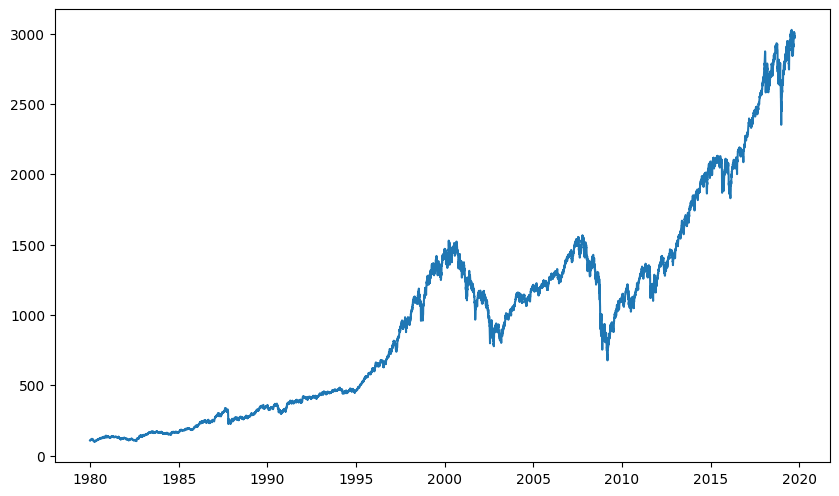

In [9]:
plt.figure(figsize = (10,6),dpi=100)
plt.plot(SP['Close'])

***2.Using logarithm return to calculate the average daily return, daily standard deviation for the whole period, and for the periods before and after January 1, 2000. Please scale the daily return and daily standard deviation and make them as annual numbers. You can scale the return by multiplying 250 and the standard deviation by the square root of 250 as we assume 250 trading day per year. Summarize them into a table and make comparison, and draw your comments.***

In [10]:
SP_before = np.log(SP.iloc[:5056,3])
SP_after = np.log(SP.iloc[5056:,3])
SP_all = np.log(SP.iloc[:,3])
SP_smry = pd.DataFrame([SP_all.diff().describe(),SP_before.diff().describe(),SP_after.diff().describe()],index=['SP_all','SP_before','SP_after']).iloc[:,1:3]
SP_smry['annual_mean'] = SP_smry['mean']*250
SP_smry['annual_std'] = SP_smry['std']*np.sqrt(250)

In [11]:
SP_smry

,mean,std,annual_mean,annual_std
SP_all,0.000333,0.011009,0.083276,0.174070
SP_before,0.000521,0.009989,0.130135,0.157941
SP_after,0.000144,0.011957,0.036058,0.189057


*Comments*

Before 2000,the sp index had more mean and less std compared with those after 2000,which means the sp index has more return and less risk before 2000.

***3.Using the data from the second period( January 1, 2000 to September 26, 2019) to calculate the daily VaR based on α = 95%, 97.50% and 99% for an investment of USD 1,000,000 dollar on the index. Daily VaR is simply a percentile measure of your investment loss amount over one day in the extreme case.***

We assume that the data obey normal distributation, then we can use delta-normal method to calculate the daily VaR.

In [24]:
from scipy.stats import norm
std = SP_smry.iloc[2,1]
mean = SP_smry.iloc[2,0]
result=[]
for a in [0.95,0.975,0.99]:
    VaR = mean + norm.ppf(1-a)*std
    ret = 1000000*(np.exp(VaR)-1)
    result+=[a,VaR,ret] 
pd.DataFrame(np.reshape(result,(3,3)),columns=['a','VaR','return'])

,a,VaR,return
0,0.950,-0.019523,-19333.989670
1,0.975,-0.023291,-23021.975903
2,0.990,-0.027672,-27292.622313


***4.Calculate the actual number of days when the market moves more than the daily VaR indicates for three different α’s, and calculate their percentages(over total trading days) and compare them with α’s for the efficacy of VaR. State your observations and draw conclusions.***

In [23]:
result = []
for a in [0.95,0.975,0.99]:
    num = len([num for num in SP_after.diff() if num <(mean+norm.ppf(1-a)*std)])
    num_1 = len(SP_after)* (1-a)
    result += [a,num,num_1]
pd.DataFrame(np.reshape(result,(3,3)),columns=['a','actual number','theory number'])

,a,actual number,theory number
0,0.950,232.0,248.250
1,0.975,158.0,124.125
2,0.990,94.0,49.650


In theory,the actural number of days should be the number of all days multiply 1-a.
<br>so the number of days should be 4965 $\times$0.05=248.25,4965$\times$0.025=124.125,4965$\times$0.01=49.65 respectively. <br>However,232<248,158>124,94>49. 
<br>So we can conclude that the daily return obey Fat-tailed distribution.

***5.Repeat above analysis for a short position of USD 1,000,000 on the index.***

In [22]:
result=[]
for a in [0.95,0.975,0.99]:
    VaR = mean + norm.ppf(a)*std
    ret = -1000000*(np.exp(VaR)-1)
    result+=[a,VaR,ret] 
pd.DataFrame(np.reshape(result,(3,3)),columns=['a','VaR','return'])

,a,VaR,return
0,0.950,0.019812,-20009.355814
1,0.975,0.023580,-23859.780665
2,0.990,0.027960,-28355.010367


In [20]:
result = []
for a in [0.95,0.975,0.99]:
    num = len([num for num in SP_after.diff() if num >(mean+norm.ppf(a)*std)])
    num_1 = len(SP_after)* (1-a)
    result += [a,num,num_1]
pd.DataFrame(np.reshape(result,(3,3)),columns=['a','actual number','theory number'])

,a,actual number,theory number
0,0.950,177.0,248.250
1,0.975,117.0,124.125
2,0.990,82.0,49.650


when a = 0.99,the actual number apparently more than the theory number, so the short position also have Fat-tailed distribution, but not apparent compared with long position.

**Problem 5**

***We have a circle with one centimeter radii, and you pick up randomly n points from the circumference, and the n points would cut the circumference into n segments. What is the expected length of the shortest arch of the n segments?***

In this problem, we can use computer to simulate the result.The n is the number we cut the circumference,and the m is the simulation number.

In [16]:
n = 5
m=100000

In [17]:
count = 0
for k in range(m):
    angle = [random.uniform(0,360) for i in range(n-1)]
    angle.sort()
    a = np.array(angle+[360])
    b = np.array([0]+angle)
    c = a - b
    count += c.min()
l = np.pi*count/(180*m)
print('expected length of the shortest arch of the', n ,'segments is',l)

expected length of the shortest arch of the 5 segments is 0.2510024121367495
